In [1]:
import numpy as np 
import pandas as pd
#matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


#  Exploring the data

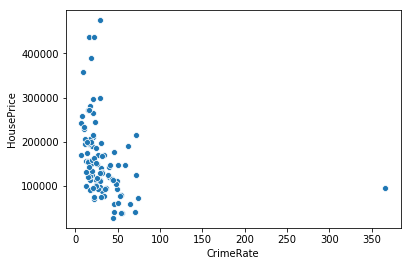

In [3]:
sns.scatterplot(x=sales['CrimeRate'], y=sales['HousePrice'])

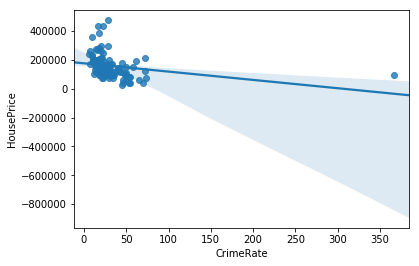

In [4]:
sns.regplot(x=sales['CrimeRate'], y=sales['HousePrice'], fit_reg=True)

## Remove outliers

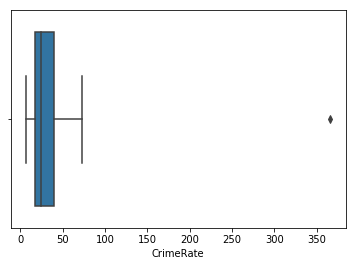

In [5]:
sns.boxplot(x=sales['CrimeRate'])

In [6]:
from scipy import stats
z = np.abs(stats.zscore(sales['CrimeRate']))
z

array([0.07702019, 0.22694994, 0.35010652, 0.45041125, 0.57624515,
       0.42899272, 0.0475697 , 0.58303309, 0.3313653 , 0.32601067,
       0.40900749, 0.4745071 , 0.04345907, 0.03007249, 0.35135052,
       0.27514164, 0.41560613, 0.35278384, 1.05280757, 0.33528662,
       0.03418312, 0.2055314 , 0.14395311, 0.39829822, 0.09576141,
       0.2992375 , 0.10647068, 0.08772946, 0.40365286, 0.43042603,
       0.39562091, 0.40900749, 0.03686043, 0.48397237, 0.45184456,
       0.10647068, 0.3153014 , 0.08772946, 0.35546115, 0.18535687,
       0.52413212, 0.22694994, 0.14519712, 0.20142077, 0.0943281 ,
       0.16001701, 0.20017677, 0.48129505, 0.38491164, 0.46255383,
       0.46523115, 0.40633017, 1.09029   , 0.68209382, 0.53751871,
       0.35402784, 0.32993199, 0.8680727 , 0.46379784, 0.59498637,
       0.56018125, 0.99926123, 8.92947406, 0.21356335, 0.69672441,
       0.5521493 , 0.40633017, 0.4571992 , 0.48397237, 0.22694994,
       0.30459213, 0.60980626, 0.07166555, 0.6794165 , 0.35278

In [7]:
np.where(z>2)

(array([62], dtype=int64),)

In [8]:
sales_2 = sales.drop([62])

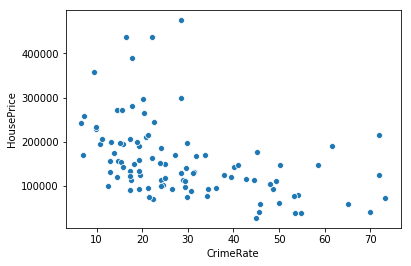

In [9]:
sns.scatterplot(x=sales_2['CrimeRate'], y=sales_2['HousePrice'])

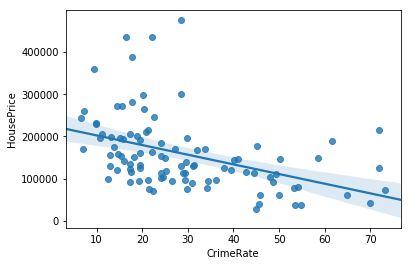

In [10]:
sns.regplot(x=sales_2['CrimeRate'], y=sales_2['HousePrice'])

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
https://www.statsmodels.org/stable/index.html

In [11]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [12]:
x = np.array(sales['CrimeRate'])
x= x.reshape(-1, 1)

In [13]:
regr.fit(x,sales['HousePrice'])
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-576.90812768]
Intercept: 
 176629.40810695427


In [14]:
x_2= np.array(sales_2['CrimeRate'])
x_2 = x_2.reshape(-1, 1)

In [15]:
regr.fit(x_2,sales_2['HousePrice'])
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-2288.68942995]
Intercept: 
 225233.5518390038


## Remove high_value outlier neighborhoods and redo analysis

In [16]:
sales_nohighend = sales_2[sales_2['HousePrice']<350000]

In [17]:
x_3 = np.array(sales_nohighend['CrimeRate'])
x_3 = x_3.reshape(-1,1)

In [18]:
regr.fit(x_3, sales_nohighend['HousePrice'])
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-1838.56264859]
Intercept: 
 199098.85266980447


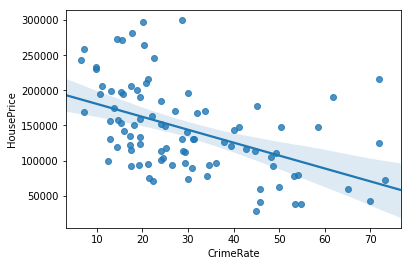

In [20]:
sns.regplot(sales_nohighend['CrimeRate'],sales_nohighend['HousePrice'])